In [ ]:
# ==================================================================================
# Diplomado en Estadística Aplicada a la Toma de Decisiones con Lenguaje R y Python
# Universidad Privada Boliviana
# ----------------------------------------------------------------------------------
#   MODELOS PREDICTIVOS PARA LA TOMA DE DECISIONES ESTRATEGICAS
# ----------------------------------------------------------------------------------
#         Enrique Alejandro Laurel Cossio, Septiembre 2024
# ==================================================================================
#    Árboles de Decisión para probelmas de regresión y clasificación
# ==================================================================================

In [152]:
# Cargamos Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score,confusion_matrix,recall_score,classification_report,precision_score
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

# 1. ÁRBOLES DE DECISIÓN - REGRESIÓN

In [23]:
# cargamos datos
url='https://raw.githubusercontent.com/ealaurel/MODELOS_PREDICTIVOS/main/data/insurance.csv'
seguros = pd.read_csv(url,sep=',', encoding='iso-8859-1')

print(seguros.shape) #
seguros.head(2)

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [24]:
# una copia de la fuente de datos
df = seguros.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [25]:
# a dummies las variables categoricas
df = pd.get_dummies(df, columns=['region','sex','smoker'], drop_first=True)
print(df.shape)
df.head(2)

(1338, 9)


,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19,27.90,0,16884.9240,False,False,True,False,True
1,18,33.77,1,1725.5523,False,True,False,True,False


In [26]:
# variables dummies  a entero
df = df.replace({True: 1, False: 0})

In [27]:
# Definir las variables independientes y dependientes
X = df[['age', 'sex_male', 'bmi', 'children', 'smoker_yes', 'region_northwest','region_southeast','region_southwest']]
y = df['charges'] # variables dependiente

# Añadir una constante a las variables independientes
X = sm.add_constant(X) # relacionado intercepto

In [28]:
# División de conjunto de datos en entrenamiento y testeo
# train - test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 22) #Separamos 30% para test

In [36]:
# entrenar un modelo de arboles de decisión para Regresión
modelo_ArbolDecisionRegres = DecisionTreeRegressor()
modelo_ArbolDecisionRegres.fit(x_train.drop(columns='const'), y_train) # omitimos la columna constante

DecisionTreeRegressor()

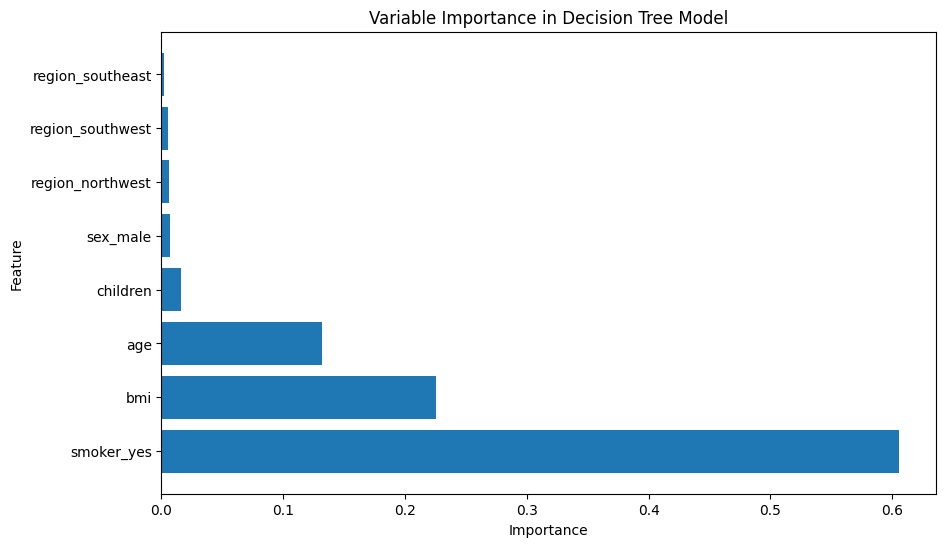

In [35]:
# Obtenemos la importancia de las variables
feature_importance = modelo_ArbolDecisionRegres.feature_importances_

# Creamos un DataFrame para visualizar las importancias junto con los nombres de las variables
feature_names = x_train.drop(columns='const').columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Ordenamos por importancia descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficamos la importancia de las variables
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Importancia de Variables en un Modelo de Árbol de Decisión')
plt.show()

In [ ]:
#import matplotlib.pyplot as plt
#from sklearn.tree import plot_tree
#plt.figure(figsize=(10, 6))
#plot_tree(modelo_ArbolDecisionRegres, filled=True, feature_names=x_train.drop(columns='const').columns)
#plt.show()

In [38]:
# Ajustar el modelo de regresión lineal
modelo_OLS = sm.OLS(y_train, x_train).fit()

# Resumen del modelo
print(modelo_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     354.2
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          9.23e-276
Time:                        21:47:02   Log-Likelihood:                -9456.6
No. Observations:                 936   AIC:                         1.893e+04
Df Residuals:                     927   BIC:                         1.897e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.299e+04   1148.340  

In [51]:
# ajustamos el indice en la data de test
x_test.reset_index(drop=True, inplace=True)

In [56]:
# calculamos predicción

# Regresión Lineal (Mínimos cuadrados ordinarios)
print('Predicción Regresión Lineal - OLS')
y_pred_OLS = modelo_OLS.predict(x_test)
print(y_pred_OLS.head(2))

# Árbol de Decisión para Regresión
print('Predicción Árbol de Decisión - Regresión')
y_pred_ArbolDecisionRegres = modelo_ArbolDecisionRegres.predict(x_test.drop(columns='const'))
y_pred_ArbolDecisionRegres = pd.DataFrame(y_pred_ArbolDecisionRegres)
print(y_pred_ArbolDecisionRegres.head(2))

Predicción Regresión Lineal - OLS
0    22825.346680
1    17845.585097
dtype: float64
Predicción Árbol de Decisión - Regresión
            0
0  15359.1045
1  14901.5167


In [61]:
# Error Cuadratico Medio

# Regresión Lineal - OLS
mse_OLS = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE)- Regresión Lineal OLS: {mse_OLS:.4f}")

# Árbol de Decisión - Regresión
mse_ArbolDecisionRegres = mean_squared_error(y_test, y_pred_ArbolDecisionRegres)
print(f"Error cuadrático medio (MSE)- Árbol de Decisión: {mse_ArbolDecisionRegres:.4f}")
# Mientras menos mejor

Error cuadrático medio (MSE)- Regresión Lineal OLS: 40986218.2527
Error cuadrático medio (MSE)- Árbol de Decisión: 45807896.4618


# 2. ÁRBOLES DE DECISIÓN - CLASIFICACIÓN

In [73]:
# cargamos datos
url='https://raw.githubusercontent.com/ealaurel/MODELOS_PREDICTIVOS/main/data/ifood_df.csv'
ifood_df = pd.read_csv(url,sep=',', encoding='iso-8859-1')

print(ifood_df.shape) #
ifood_df.head(2)

(2205, 39)


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0


In [74]:
# una copia a los datos
df = ifood_df.copy()

In [75]:
# seleccionamos variables explicativas y variables dependiente
X = df[['Kidhome','Recency','education_Basic','Complain','Income','MntTotal','Age']]
y = df['Response']

In [76]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

In [132]:
# hallamos los mejors hiperparametros del modelo
# Crear el clasificador
clf = DecisionTreeClassifier()

# Definir la grilla de hiperparámetros a explorar
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realizar búsqueda en la grilla
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros encontrados
best_params = grid_search.best_params_
best_params

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}

In [149]:
# Entrenamos el Modelo de Árbol de Decisión para Clasificación

# Crea un clasificador de árbol de decisión
modelo_ArbolDecisionClasif = DecisionTreeClassifier(max_depth=10,min_samples_leaf=2,min_samples_split=5)

# Entrena el modelo en los datos de entrenamiento
modelo_ArbolDecisionClasif.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)

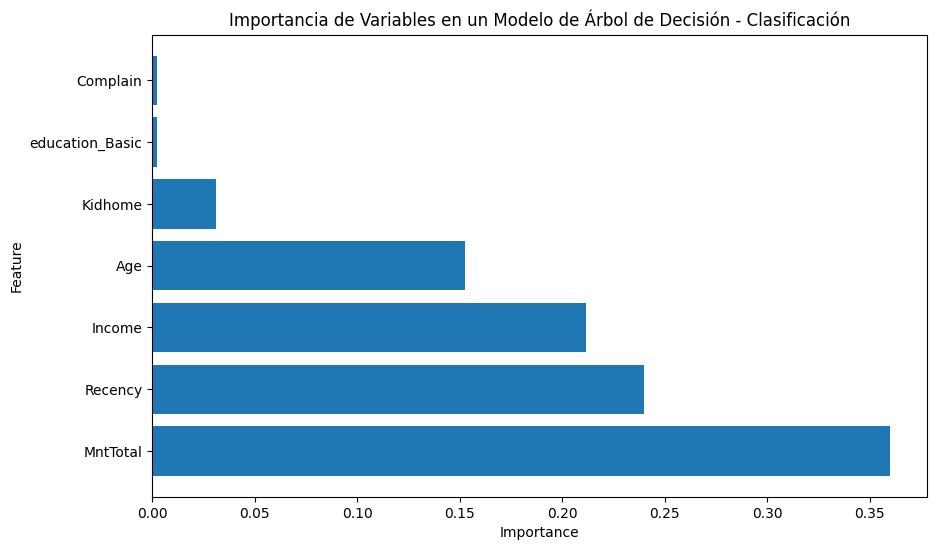

In [150]:
# Obtenemos la importancia de las variables
feature_importance = modelo_ArbolDecisionClasif.feature_importances_

# Creamos un DataFrame para visualizar las importancias junto con los nombres de las variables
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Ordenamos por importancia descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficamos la importancia de las variables
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Importancia de Variables en un Modelo de Árbol de Decisión - Clasificación')
plt.show()

In [ ]:
#import matplotlib.pyplot as plt
#from sklearn.tree import plot_tree
#plt.figure(figsize=(10, 6))
#plot_tree(modelo_ArbolDecisionClasif, filled=True, feature_names=X_train.columns)
#plt.show()

In [135]:
# Ajusta el modelo de regresión logística
modelo_logit = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.347831
         Iterations 7


In [136]:
# Muestra un resumen del modelo
print(modelo_logit.summary())

                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1764
Model:                          Logit   Df Residuals:                     1757
Method:                           MLE   Df Model:                            6
Date:                Wed, 25 Sep 2024   Pseudo R-squ.:                  0.1560
Time:                        22:39:30   Log-Likelihood:                -613.57
converged:                       True   LL-Null:                       -727.02
Covariance Type:            nonrobust   LLR p-value:                 3.528e-46
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Kidhome             0.4136      0.159      2.598      0.009       0.102       0.726
Recency            -0.0274      0.003     -9.976      0.000      -0.033      -0.022
education_Basic    -1.3338      

In [137]:
# ajustamos el indice en x_test
X_test.reset_index(drop=True, inplace=True)

In [138]:
# Realiza predicciones en el conjunto de datos de prueba

# Regresión Logistica - Logit
print('Predicción Regresión Logística - Logit')
y_pred_logit = modelo_logit.predict(X_test)
print(y_pred_logit.head(2))

# Arbol de Decisión - Clasificación
print('Predicción Árbol de Decisión - Clasificación')
y_pred_ArbolDecisionClasif = modelo_ArbolDecisionClasif.predict_proba(X_test)
y_pred_ArbolDecisionClasif = pd.DataFrame(y_pred_ArbolDecisionClasif)
y_pred_ArbolDecisionClasif = y_pred_ArbolDecisionClasif.iloc[:,1]
print(y_pred_ArbolDecisionClasif.head(2))

Predicción Regresión Logística - Logit
0    0.069715
1    0.037336
dtype: float64
Predicción Árbol de Decisión - Clasificación
0    0.0
1    0.0
Name: 1, dtype: float64


In [139]:
# Calcular la curva ROC - LOGIT
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logit)

# Encontrar el umbral óptimo (máximo índice de Youden)
youden_index = tpr - fpr
optimal_threshold = thresholds[np.argmax(youden_index)]

print("Umbral óptimo Logit:", optimal_threshold)

Umbral óptimo Logit: 0.07185771726426074


In [140]:
# Calcular la curva ROC - Arbol de Decisión
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ArbolDecisionClasif)

# Encontrar el umbral óptimo (máximo índice de Youden)
youden_index = tpr - fpr
optimal_threshold = thresholds[np.argmax(youden_index)]

print("Umbral óptimo- Arbol de Decisión:", optimal_threshold)

Umbral óptimo- Arbol de Decisión: 0.08571428571428572


In [142]:
# Matriz de confusión

            #Predicción
            #   0   1
#ValorReal  0 # VN FP
#Valor Real 1 # FN VP

# Regresión Logistica - Logit
confusion = confusion_matrix(y_test, (y_pred_logit>=0.0718577).astype(int))
print("Matriz de confusión - Logit:")
print(confusion)

# Árbol de Decisión - Clasificación
confusion = confusion_matrix(y_test, (y_pred_ArbolDecisionClasif>=0.08571428571428572).astype(int))
print("\nMatriz de confusión - Árbol de Decisión:")
print(confusion)

Matriz de confusión - Logit:
[[157 205]
 [  9  70]]

Matriz de confusión - Árbol de Decisión:
[[278  84]
 [ 44  35]]


In [144]:
# Exactitud o Accuracy del modelo

# Regresión Logistica - Logit
exactitud_test_logit = accuracy_score(y_test, (y_pred_logit>=0.0718577).astype(int))
print("Precisión del modelo-Logit:", exactitud_test_logit)

# Árbol de Decisión - Clasificación
exactitud_test_ArbolDecisionClasif = accuracy_score(y_test, (y_pred_ArbolDecisionClasif>=0.08571428571428572).astype(int))
print("Precisión del modelo-Arbol de Decisión:", exactitud_test_ArbolDecisionClasif)

Precisión del modelo-Logit: 0.5147392290249433
Precisión del modelo-Arbol de Decisión: 0.7097505668934241


In [151]:
# Sensibilidad

# Regresion Logistica - Logit
sensibilidad_test_logit = recall_score(y_test, (y_pred_logit>=0.0718577).astype(int))
print("Sensibilidad del modelo-Logit:", sensibilidad_test_logit)

# Árbol de Decisión - Clasificación
sensibilidad_test_ArbolDecisionClasif = recall_score(y_test, (y_pred_ArbolDecisionClasif>=0.08571428571428572).astype(int))
print("Sensibilidad del modelo-Arbol de Decisión:", sensibilidad_test_ArbolDecisionClasif)

Sensibilidad del modelo-Logit: 0.8860759493670886
Sensibilidad del modelo-Arbol de Decisión: 0.4430379746835443


In [153]:
# Precisión (Proporción de Verdaderos Positivos de las predicciónes positivas del modelo)

# Regresión Logistica - Logit
precision_score_logit = precision_score(y_test, (y_pred_logit>=0.0718577).astype(int))
print("Precisión del modelo - Logit", precision_score_logit)

# Arbol de Decisión - Clasificación
precision_score_ArbolDecisionClasif = precision_score(y_test, (y_pred_ArbolDecisionClasif>=0.08571428571428572).astype(int))
print("Precisión del modelo - Árbol de Decisión", precision_score_ArbolDecisionClasif)

Precisión del modelo - Logit 0.2545454545454545
Precisión del modelo - Árbol de Decisión 0.29411764705882354
